# Training and Visualizing a Decision Tree


**Like SVMs, Decision Trees are versatile Machine Learning algorithms that can per‐
form both classification and regression tasks, and even multioutput tasks. They are
very powerful algorithms, capable of fitting complex datasets. For example you trained a DecisionTreeRegressor model on the California housing dataset,
fitting it perfectly (actually overfitting it).
Decision Trees are also the fundamental components of Random Forests , which are among the most powerful Machine Learning algorithms available
today.
In this chapter we will start by discussing how to train, visualize, and make predic‐
tions with Decision Trees. Then we will go through the CART training algorithm
used by Scikit-Learn, and we will discuss how to regularize trees and use them for**

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

#### You can visualize the trained Decision Tree by first using the export_graphviz()
#### method to output a graph definition file called iris_tree.dot:

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(
 tree_clf,
 out_file="iris_tree.dot",
 feature_names=iris.feature_names[2:],
 class_names=iris.target_names,
 rounded=True,
 filled=True
 )


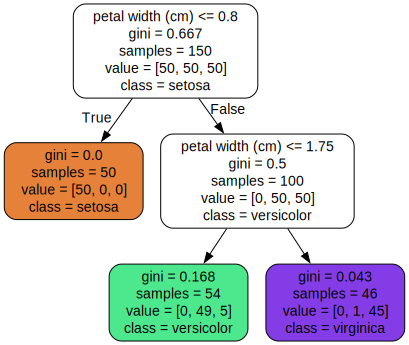

In [3]:
from graphviz import Source
Source.from_file("iris_tree.dot")

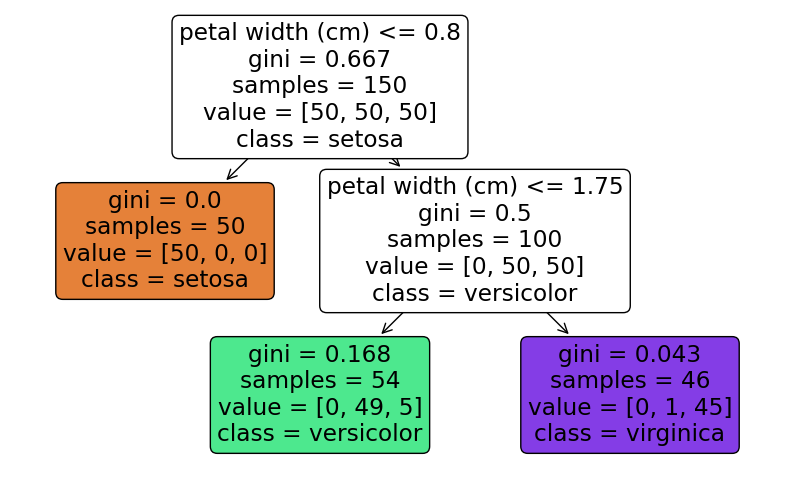

In [4]:
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Create and fit the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True)
plt.show()


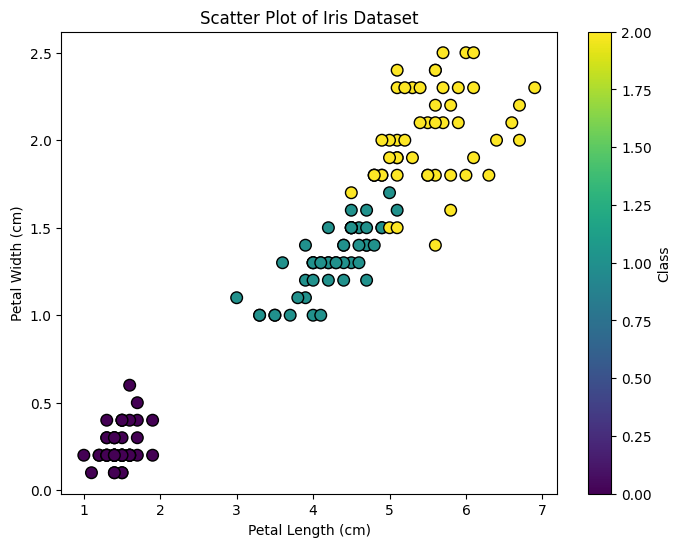

In [5]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=70)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# Making Predictions


**Let’s see how the tree represented makes predictions. Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the
top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,
then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf
node (i.e., it does not have any children nodes), so it does not ask any questions: you
can simply look at the predicted class for that node and the Decision Tree predicts
that your flower is an Iris-Setosa (class=setosa).
Now suppose you find another flower, but this time the petal length is greater than
2.45 cm. You must move down to the root’s right child node (depth 1, right), which is
not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If
it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely
an Iris-Virginica (depth 2, right). It’s really that simple.**

**A node’s samples attribute counts how many training instances it applies to. For
example, 100 training instances have a petal length greater than 2.45 cm (depth 1,
right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left). A
node’s value attribute tells you how many training instances of each class this node
applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 IrisVersicolor, and 45 Iris-Virginica. Finally, a node’s gini attribute measures its impur‐
ity: a node is “pure” (gini=0) if all training instances it applies to belong to the same
class. For example, since the depth-1 left node applies only to Iris-Setosa training
instances, it is pure and its gini score is 0. ‐
rithm computes the gini score Gi
 of the ith node. For example, the depth-2 left node
has a gini score equal to 1 – (0/54)2
 – (49/54)2
 – (5/54)2 ≈ 0.168. Another impurity
measure is discussed shortly.
. Gini impurity
Gi
= 1 − ∑
k = 1
n
pi, k
2
• pi,k
 is the ratio of class k instances among the training instances in the i
th node.**

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])


array([1])